In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle

import matplotx
import numpy as np
import pandas as pd

from scipy.stats import sem

from gptchem.plotsettings import *

%matplotlib inline

In [3]:
all_res = glob("out/**/*.pkl")

In [4]:
compiled_res = []
compiled_drfp_linear = []
compiled_drfp_rbf = []
compiled_ohe_tanimoto = []
compiled_rxnfp_linear = []
compiled_rxnfp_rbf = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded["representation"]
    num_points = loaded["num_train_points"]

    metrics = {
        "representation": loaded["representation"],
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
    }

    compiled_res.append(metrics)

    drfp_rbf_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["drfp-rbf"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["drfp-rbf"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["drfp-rbf"]["mean_squared_error"],
    }

    compiled_drfp_rbf.append(drfp_rbf_metrics)

    ohe_tanimoto_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["ohe-tanimoto"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["ohe-tanimoto"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["ohe-tanimoto"]["mean_squared_error"],
    }

    compiled_ohe_tanimoto.append(ohe_tanimoto_metrics)

    rxnfp_linear_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["rxnfp-linear"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["rxnfp-linear"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["rxnfp-linear"]["mean_squared_error"],
    }

    compiled_rxnfp_linear.append(rxnfp_linear_metrics)

    rxnfp_rbf_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["rxnfp-rbf"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["rxnfp-rbf"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["rxnfp-rbf"]["mean_squared_error"],
    }

    compiled_rxnfp_rbf.append(rxnfp_rbf_metrics)

    drfp_linear_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["drfp-linear"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["drfp-linear"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["drfp-linear"]["mean_squared_error"],
    }

    compiled_drfp_linear.append(drfp_linear_metrics)

In [5]:
compiled_res = pd.DataFrame(compiled_res)
compiled_drfp_linear = pd.DataFrame(compiled_drfp_linear)
compiled_drfp_rbf = pd.DataFrame(compiled_drfp_rbf)
compiled_ohe_tanimoto = pd.DataFrame(compiled_ohe_tanimoto)
compiled_rxnfp_linear = pd.DataFrame(compiled_rxnfp_linear)
compiled_rxnfp_rbf = pd.DataFrame(compiled_rxnfp_rbf)

In [6]:
compiled_drfp_rbf

,num_train_points,mae,max_error,mse
0,50,23.702256,55.272698,746.500877
1,20,18.425919,56.458437,523.177983
2,20,22.750058,60.129024,693.408795
3,10,24.732779,54.471937,812.123646
4,20,20.738355,59.143897,603.333277
...,...,...,...,...
56,20,25.102119,59.717659,837.785907
57,200,12.338487,41.337065,249.172745
58,50,23.702256,55.272698,746.500877
59,200,10.594012,32.369000,163.046009


In [7]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std", sem]
)

In [9]:
compiled_drfp_linear_grouped = compiled_drfp_linear.groupby(["num_train_points"]).agg(
    ["mean", "std", sem]
)

compiled_drfp_rbf_grouped = compiled_drfp_rbf.groupby(["num_train_points"]).agg(["mean", "std", sem])

compiled_ohe_tanimoto_grouped = compiled_ohe_tanimoto.groupby(["num_train_points"]).agg(
    ["mean", "std", sem]
)

compiled_rxnfp_linear_grouped = compiled_rxnfp_linear.groupby(["num_train_points"]).agg(
    ["mean", "std", sem]
)

compiled_rxnfp_rbf_grouped = compiled_rxnfp_rbf.groupby(["num_train_points"]).agg(["mean", "std", sem])

In [10]:
compiled_grouped_res

mae                      max_error  \
                                      mean       std       sem       mean   
representation num_train_points                                             
DreherDoyle    10                25.486875  3.153364       NaN  79.562500   
               20                27.336364  3.307117  0.997133  84.454545   
               50                26.418182  3.101386  0.935103  88.090909   
               100               21.594000  2.841765  0.898645  78.900000   
               200               16.552727  2.752316  0.829854  72.181818   

                                                              mse              \
                                       std       sem         mean         std   
representation num_train_points                                                 
DreherDoyle    10                11.581415       NaN  1074.873125  313.930268   
               20                 7.903969  2.383136  1247.014545  325.141983   
               50                 3.238967  0.976585  1263.754545  272.830838   
               100                8.033956  2.540560   893.606000  209.470519   
               200                6.226045  1.877223   586.030909  162.260931   

                                            
                                       sem  
representation num_train_points             
DreherDoyle    10                      NaN  
               20                98.033997  
               50                82.261593  
               100               66.240394  
               200               48.923512

In [11]:
compiled_rxnfp_linear_grouped

mae                      max_error             \
                       mean       std       sem       mean        std   
num_train_points                                                        
10                23.763425  1.153795  0.271952  64.846259   5.986430   
20                21.577061  1.810333  0.545836  60.746247   6.034914   
50                18.564530  1.901270  0.573255  60.200258  10.405122   
100               16.274435  2.015021  0.637206  58.408548   8.495679   
200               13.315537  1.051013  0.316892  49.577964   4.678286   

                                   mse                        
                       sem        mean        std        sem  
num_train_points                                              
10                1.411015  801.937340  93.596476  22.060901  
20                1.819595  684.946578  80.743632  24.345121  
50                3.137262  533.395420  81.761050  24.651884  
100               2.686570  454.790231  97.693916  30.893529  
200               1.410556  291.926878  45.164642  13.617652

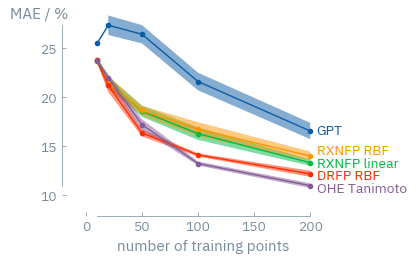

In [17]:

fig, ax = plt.subplots(1, 1)
ax.plot(
    compiled_grouped_res.loc["DreherDoyle", :].index,
    compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"],
    label="GPT",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["DreherDoyle", :].index,
    compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"]
    - compiled_grouped_res.loc["DreherDoyle", :]["mae"]["sem"],
    compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"]
    + compiled_grouped_res.loc["DreherDoyle", :]["mae"]["sem"],
    alpha=.5
)

ax.plot(
    compiled_rxnfp_linear_grouped.index,
    compiled_rxnfp_linear_grouped["mae"]["mean"],
    label="RXNFP linear",
    marker="o",
)

ax.fill_between(
    compiled_rxnfp_linear_grouped.index,
    compiled_rxnfp_linear_grouped["mae"]["mean"] - compiled_rxnfp_linear_grouped["mae"]["sem"],
    compiled_rxnfp_linear_grouped["mae"]["mean"] + compiled_rxnfp_linear_grouped["mae"]["sem"],
    alpha=.5
)

ax.plot(
    compiled_rxnfp_rbf_grouped.index,
    compiled_rxnfp_rbf_grouped["mae"]["mean"],
    label="RXNFP RBF",
    marker="o",
)

ax.fill_between(
    compiled_rxnfp_rbf_grouped.index,
    compiled_rxnfp_rbf_grouped["mae"]["mean"] - compiled_rxnfp_rbf_grouped["mae"]["sem"],
    compiled_rxnfp_rbf_grouped["mae"]["mean"] + compiled_rxnfp_rbf_grouped["mae"]["sem"],
    alpha=.5
)

ax.plot(
    compiled_drfp_linear_grouped.index,
    compiled_drfp_linear_grouped["mae"]["mean"],
    label="DRFP RBF",
    marker="o",
)

ax.fill_between(
    compiled_drfp_linear_grouped.index,
    compiled_drfp_linear_grouped["mae"]["mean"] - compiled_drfp_linear_grouped["mae"]["sem"],
    compiled_drfp_linear_grouped["mae"]["mean"] + compiled_drfp_linear_grouped["mae"]["sem"],
    alpha=.5
)

ax.plot(
    compiled_ohe_tanimoto_grouped.index,
    compiled_ohe_tanimoto_grouped["mae"]["mean"],
    label="OHE Tanimoto",
    marker="o",
)

ax.fill_between(
    compiled_ohe_tanimoto_grouped.index,
    compiled_ohe_tanimoto_grouped["mae"]["mean"] - compiled_ohe_tanimoto_grouped["mae"]["sem"],
    compiled_ohe_tanimoto_grouped["mae"]["mean"] + compiled_ohe_tanimoto_grouped["mae"]["sem"],
    alpha=.5
)

matplotx.line_labels()

ax.set_xlabel("number of training points", labelpad=4)
ylabel_top("MAE / %", y_pad=0.03)
# ax.set_xscale('log')

range_frame(
    ax, 
     compiled_ohe_tanimoto_grouped.index,
     np.stack(
    [  compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"],
    #+ compiled_grouped_res.loc["DreherDoyle", :]["mae"]["sem"], 
    compiled_ohe_tanimoto_grouped["mae"]["mean"] #- compiled_ohe_tanimoto_grouped["mae"]["sem"]
    ]
     ).flatten()
)

fig.savefig("doyle_regression_res.pdf", bbox_inches="tight")